Question 8 - Using the data from Question 5, write code the analyze the data and answer the following questions Note -

Draw plots to demonstrate the analysis for the following questions and better visualizations
Write code comments wherever required for code understanding Insights to be drawn - ● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on. ● Get all the episode names, whose average rating is more than 8 for every season ● Get all the episode names that aired before May 2019 ● Get the episode name from each season with the highest and lowest rating ● Get the summary for the most popular ( ratings ) episode in every season


Draw plots to demonstrate the analysis for the following questions and better visualizations

In [7]:
import requests
import json
import datetime
import pandas as pd

# Function to download data from the API link
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

# Function to extract the desired data attributes
def extract_data(data):
    show_info = {}
    show_info['id'] = data['id']
    show_info['url'] = str(data['url'])
    show_info['name'] = data['name']
    
    episodes = data['_embedded']['episodes']
    episodes_info = []
    
    for episode in episodes:
        episode_info = {}
        episode_info['season'] = episode['season']
        episode_info['number'] = episode['number']
        episode_info['type'] = episode['type']
        episode_info['episode_name'] = episode['name']
        
        #Extracting date from the airdate
        airdate = episode['airdate']
        episode_info['airdate'] = datetime.datetime.strptime(airdate, '%Y-%m-%d').date()
        
        airtime = episode['airtime']
        episode_info['airtime'] = datetime.datetime.strptime(airtime, '%H:%M').strftime('%I:%M %p')
        
        episode_info['runtime'] = episode['runtime']
        episode_info['average_rating'] = episode['rating']['average']
        episode_info['summary'] = episode['summary'].strip('<p>').strip('</p>')
        episode_info['medium_image'] = episode['image']['medium']
        episode_info['original_image'] = episode['image']['original']
        
        episodes_info.append(episode_info)
    
    show_info['episodes'] = episodes_info
    
    return show_info

# Function to save data in CSV format
def save_to_csv(data, filename):
    df0=data.copy()
    df0.popitem()
    df1 = pd.DataFrame(df0, index=[0])
    df2 = pd.DataFrame(data['episodes'])
    df=pd.concat([df1, df2], axis=1)
    df.to_csv(filename, index=False)

# Main program
if __name__ == '__main__':
    url = 'http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
    filename = 'Show_data.csv'

    # Download data
    data = download_data(url)

    # Convert data
    structured_data = extract_data(data)

    # Save data to CSV
    save_to_csv(structured_data, filename)

# Read the CSV file into a pandas DataFrame
df5 = pd.read_csv('Show_data.csv')
df5.head()


,id,url,name,season,number,type,episode_name,airdate,airtime,runtime,average_rating,summary,medium_image,original_image
0,1371.0,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,1,regular,The Original,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,NaN,NaN,NaN,1,2,regular,Chestnut,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,NaN,NaN,NaN,1,3,regular,The Stray,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,NaN,NaN,NaN,1,4,regular,Dissonance Theory,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,NaN,NaN,NaN,1,5,regular,Contrapasso,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


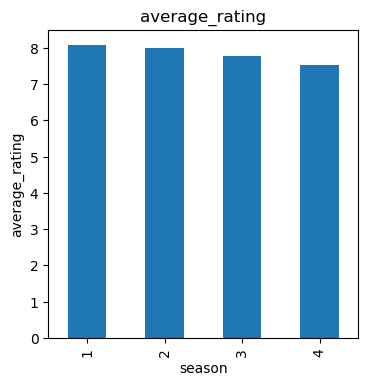

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))

df5.groupby('season')['average_rating'].mean().plot.bar()
plt.title('average_rating')
plt.xlabel('season')
plt.ylabel('average_rating')
plt.show()

In [9]:
df_test=df5[['season','average_rating']]
df_test.groupby('season')['average_rating'].mean()

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

2.Get all the episode names, whose average rating is more than 8 for every season

In [10]:
filtered_data=df5[df5['average_rating']>8]
df_rating_more_than_8 = filtered_data['episode_name'].tolist()
print(df_rating_more_than_8)

["Trompe L'Oeil", 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Kiksuya', 'Vanishing Point', 'The Passenger']


3. Get all the episode names that aired before May 2019

In [11]:
filtered_data=df5[df5['airdate']<'2019-05']
df_rating_more_than_8 = filtered_data['episode_name'].tolist()
print(df_rating_more_than_8)

['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger']


4. Get the episode name from each season with the highest and lowest rating

In [12]:
data_rating_max = df5.groupby(['season','episode_name'])['average_rating'].max()

data_rating_min = df5.groupby(['season','episode_name'])['average_rating'].min()

merged_ratings = pd.merge(data_rating_max, data_rating_min, on=['season','episode_name'], how='inner')

merged_ratings = merged_ratings.rename(columns={'average_rating_x': 'highest_rating', 'average_rating_y': 'lowest_rating'})


In [13]:
merged_ratings

highest_rating  lowest_rating
season episode_name                                            
1      Chestnut                              7.7            7.7
       Contrapasso                           8.0            8.0
       Dissonance Theory                     7.9            7.9
       The Adversary                         8.0            8.0
       The Bicameral Mind                    8.7            8.7
       The Original                          8.0            8.0
       The Stray                             7.6            7.6
       The Well-Tempered Clavier             8.5            8.5
       Trace Decay                           7.9            7.9
       Trompe L'Oeil                         8.6            8.6
2      Akane No Mai                          7.6            7.6
       Journey Into Night                    7.8            7.8
       Kiksuya                               8.7            8.7
       Les Écorchés                          7.9            7.9
       Phase Space                           7.7            7.7
       Reunion                               7.7            7.7
       The Passenger                         8.5            8.5
       The Riddle of the Sphinx              8.0            8.0
       Vanishing Point                       8.4            8.4
       Virtù e Fortuna                       7.7            7.7
3      Crisis Theory                         7.7            7.7
       Decoherence                           7.5            7.5
       Genre                                 7.9            7.9
       Parce Domine                          8.0            8.0
       Passed Pawn                           7.5            7.5
       The Absence of Field                  7.8            7.8
       The Mother of Exiles                  8.0            8.0
       The Winter Line                       7.8            7.8
4      Années Folles                         7.6            7.6
       Fidelity                              7.5            7.5
       Generation Loss                       7.7            7.7
       Metanoia                              7.7            7.7
       Que Será, Será                        7.5            7.5
       The Auguries                          7.1            7.1
       Well Enough Alone                     7.4            7.4
       Zhuangzi                              7.8            7.8

5. Get the summary for the most popular ( ratings ) episode in every season

In [14]:
most_popular_episodes = df5.groupby('season')['average_rating'].idxmax()
summary_most_popular = df5.loc[most_popular_episodes, ['season', 'episode_name', 'summary']]
  

summary_most_popular


,season,episode_name,summary
9,1,The Bicameral Mind,Delores finds out the truth about William's fa...
17,2,Kiksuya,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,God is bored.
